In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_excel("/content/DV+Sales+Data.xlsx")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,43,CA-2016-101343,2016-07-17,2016-07-22,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Los Angeles,...,90049,West,OFF-ST-10003479,Office Supplies,Storage,"Eldon Base for stackable storage shelf, platinum",77.88,2,0.0,3.8940
1,514,CA-2017-163405,2017-12-21,2017-12-25,Standard Class,BN-11515,Bradley Nguyen,Consumer,United States,Los Angeles,...,90049,West,OFF-AR-10003811,Office Supplies,Art,Newell 327,6.63,3,0.0,1.7901
2,515,CA-2017-163405,2017-12-21,2017-12-25,Standard Class,BN-11515,Bradley Nguyen,Consumer,United States,Los Angeles,...,90049,West,OFF-AR-10001246,Office Supplies,Art,Newell 317,5.88,2,0.0,1.7052
3,1606,US-2016-115819,2016-04-19,2016-04-24,Second Class,JO-15280,Jas O'Carroll,Consumer,United States,Los Angeles,...,90049,West,OFF-AR-10000823,Office Supplies,Art,Newell 307,5.46,3,0.0,1.5288
4,1607,US-2016-115819,2016-04-19,2016-04-24,Second Class,JO-15280,Jas O'Carroll,Consumer,United States,Los Angeles,...,90049,West,OFF-AR-10004456,Office Supplies,Art,Panasonic KP-4ABK Battery-Operated Pencil Shar...,73.20,5,0.0,21.2280


In [ ]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


In [ ]:
df=df.drop(['Postal Code','Country'],axis=1)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,43,CA-2016-101343,2016-07-17,2016-07-22,Standard Class,RA-19885,Ruben Ausman,Corporate,Los Angeles,California,West,OFF-ST-10003479,Office Supplies,Storage,"Eldon Base for stackable storage shelf, platinum",77.88,2,0.0,3.8940
1,514,CA-2017-163405,2017-12-21,2017-12-25,Standard Class,BN-11515,Bradley Nguyen,Consumer,Los Angeles,California,West,OFF-AR-10003811,Office Supplies,Art,Newell 327,6.63,3,0.0,1.7901
2,515,CA-2017-163405,2017-12-21,2017-12-25,Standard Class,BN-11515,Bradley Nguyen,Consumer,Los Angeles,California,West,OFF-AR-10001246,Office Supplies,Art,Newell 317,5.88,2,0.0,1.7052
3,1606,US-2016-115819,2016-04-19,2016-04-24,Second Class,JO-15280,Jas O'Carroll,Consumer,Los Angeles,California,West,OFF-AR-10000823,Office Supplies,Art,Newell 307,5.46,3,0.0,1.5288
4,1607,US-2016-115819,2016-04-19,2016-04-24,Second Class,JO-15280,Jas O'Carroll,Consumer,Los Angeles,California,West,OFF-AR-10004456,Office Supplies,Art,Panasonic KP-4ABK Battery-Operated Pencil Shar...,73.20,5,0.0,21.2280


In [ ]:
df.shape

(9994, 19)

In [ ]:
df.count()

,0
Row ID,9994
Order ID,9994
Order Date,9994
Ship Date,9994
Ship Mode,9994
Customer ID,9994
Customer Name,9994
Segment,9994
City,9994
State,9994


In [ ]:
duplicate_rows=df[df.duplicated()]
print("No of duplicate rows are :",duplicate_rows.shape)

No of duplicate rows are : (0, 19)


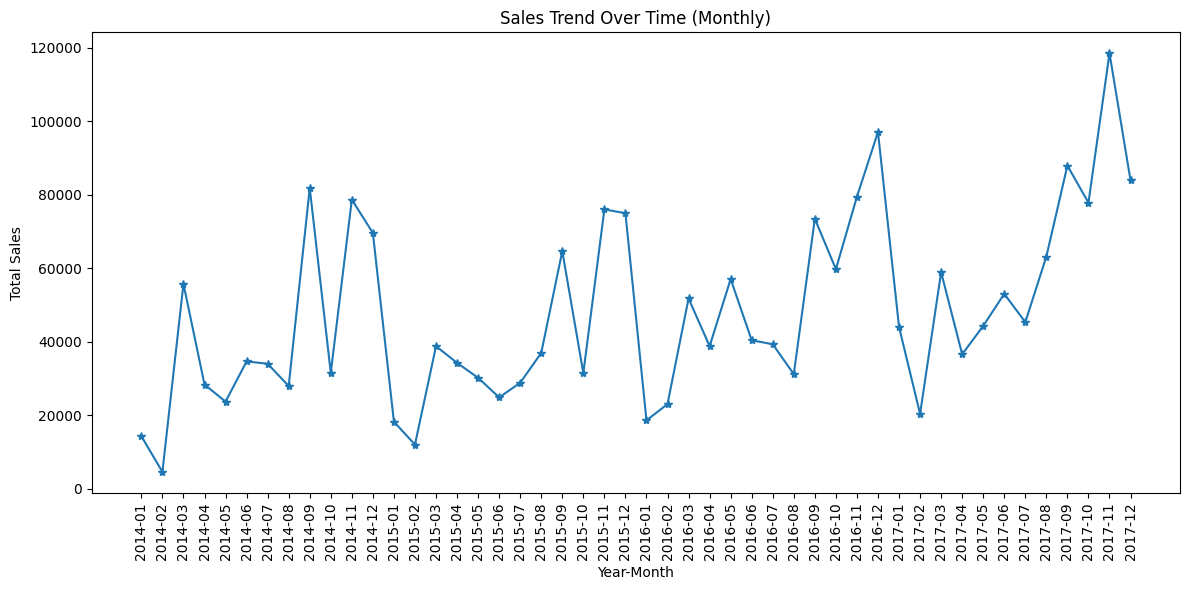

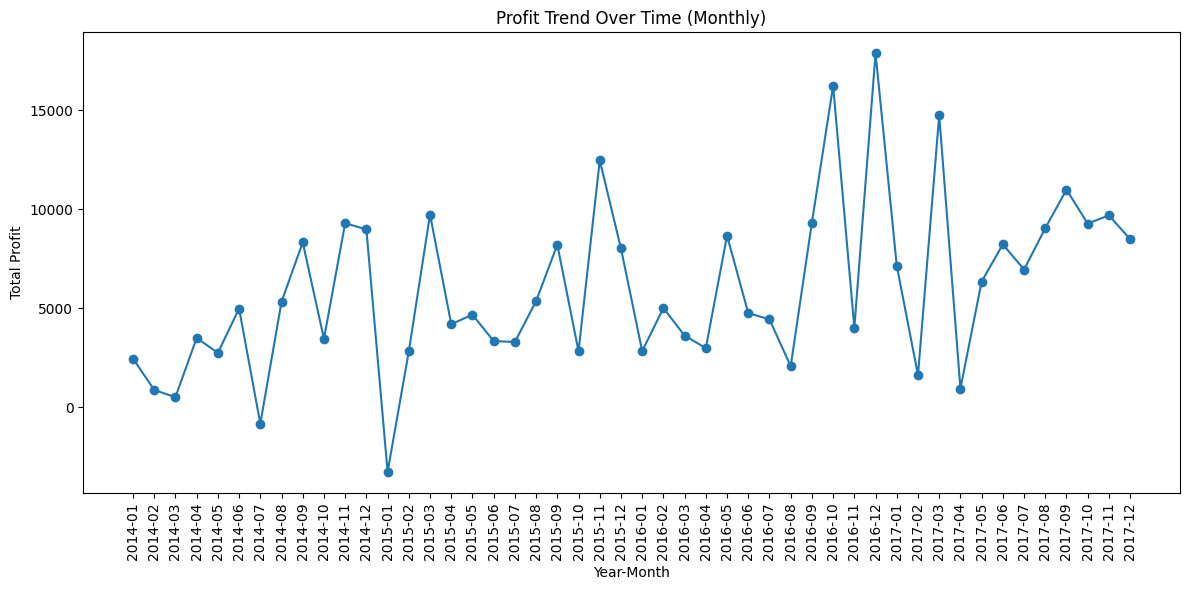

In [ ]:
# Overall Sales and Profit Trends (Monthly / Quarterly / Yearly)
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Order Date is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a Year-Month column for time series grouping
df['Year_Month'] = df['Order Date'].dt.to_period('M').astype(str)

# Group by Year-Month for monthly trend
monthly_trend = df.groupby('Year_Month')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_trend['Year_Month'], monthly_trend['Sales'],marker='*')
plt.xticks(rotation=90)
plt.title("Sales Trend Over Time (Monthly)")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(monthly_trend['Year_Month'], monthly_trend['Profit'],marker='o')
plt.xticks(rotation=90)
plt.title("Profit Trend Over Time (Monthly)")
plt.xlabel("Year-Month")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()




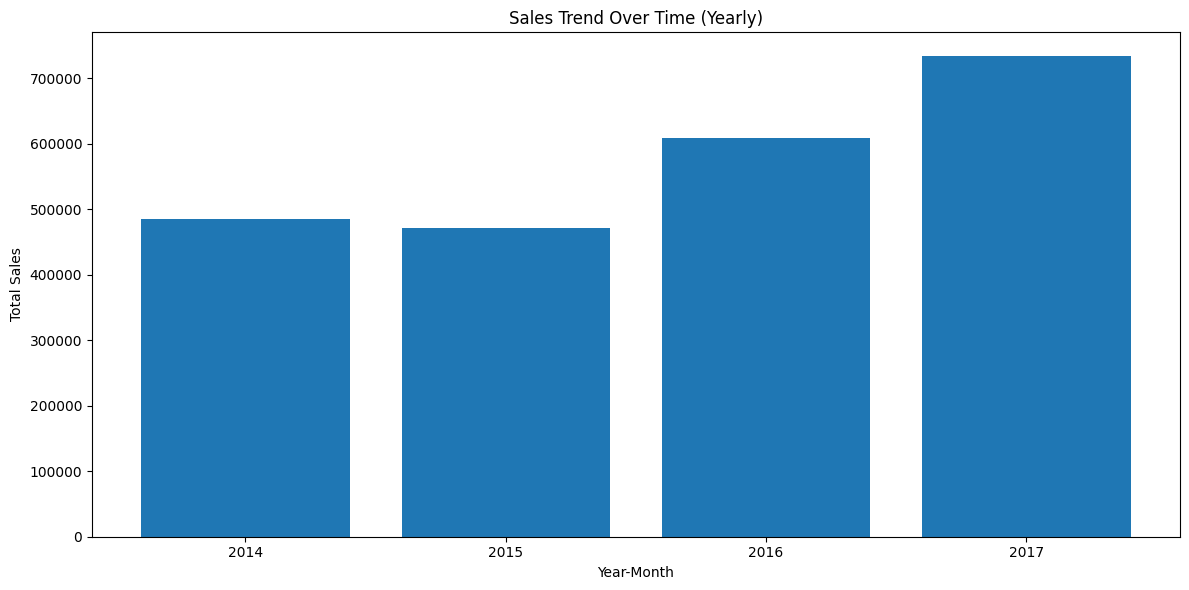

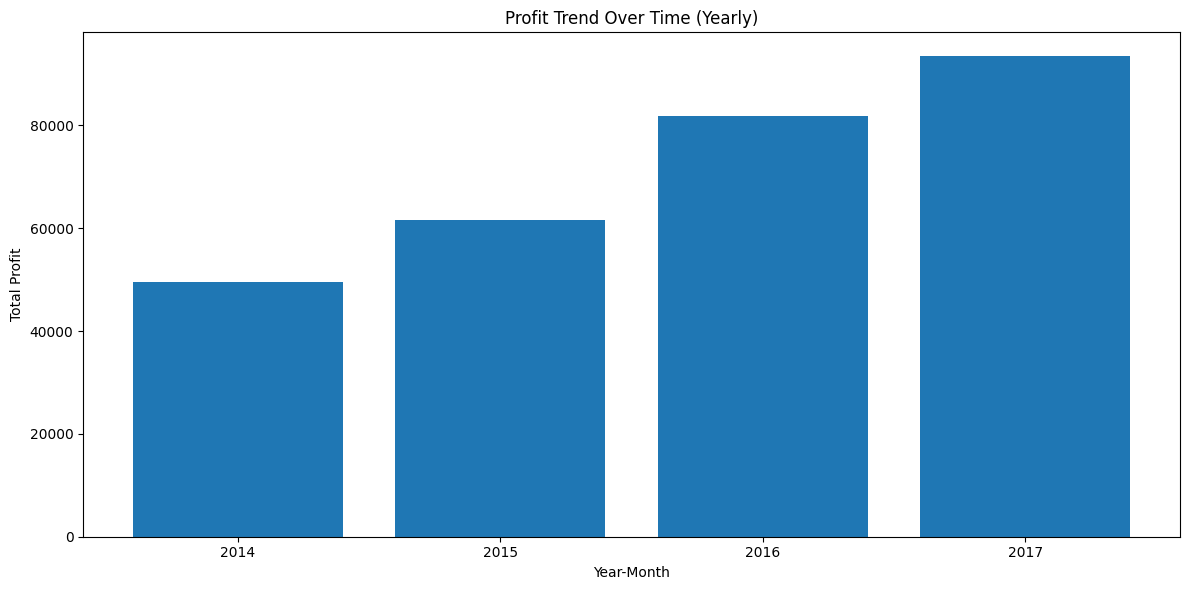

In [ ]:
# Overall Sales and Profit Trends (Monthly / Quarterly / Yearly)
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Order Date is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create a Year column for time series grouping
df['Year'] = df['Order Date'].dt.to_period('Y').astype(str)

# Group by Year-Month for monthly trend
year_trend = df.groupby('Year')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.bar(year_trend['Year'], year_trend['Sales'])
plt.title("Sales Trend Over Time (Yearly)")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.bar(year_trend['Year'], year_trend['Profit'])
plt.title("Profit Trend Over Time (Yearly)")
plt.xlabel("Year-Month")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()


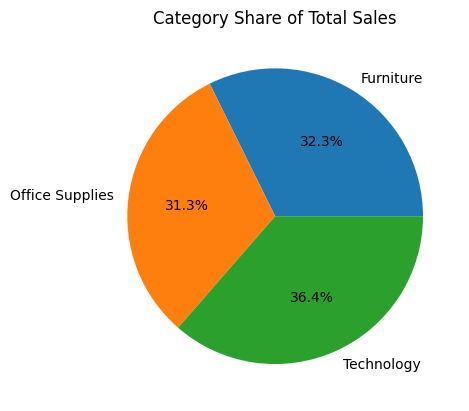

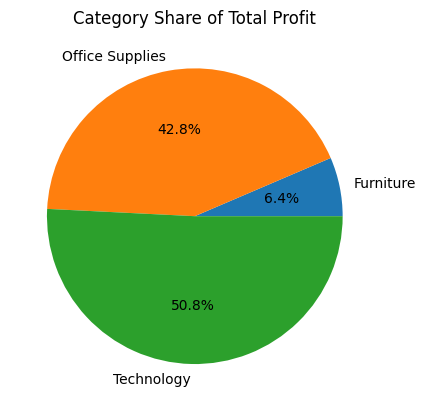

In [ ]:
#Best and Worst Performing Categories & Sub-Categories
# Group by Category
cat = df.groupby('Category')[['Sales', 'Profit']].sum()

# Pie Chart – Sales
plt.pie(cat['Sales'], labels=cat.index, autopct='%1.1f%%')
plt.title("Category Share of Total Sales")
plt.show()

# Pie Chart – Profit
plt.pie(cat['Profit'], labels=cat.index, autopct='%1.1f%%')
plt.title("Category Share of Total Profit")
plt.show()


<Figure size 1200x600 with 0 Axes>

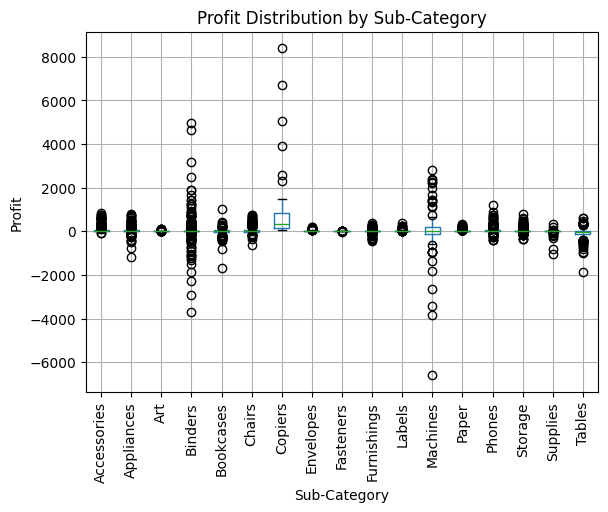

In [ ]:
#Profit distribution by sub-category
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df.boxplot(column='Profit', by='Sub-Category')
plt.title("Profit Distribution by Sub-Category")
plt.suptitle("")   # Removes the automatic "Boxplot grouped by..." title
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()


In [ ]:
import plotly.express as px

# Group data by State and City to get total sales for each combination
state_city_sales = df.groupby(['State', 'City'])['Sales'].sum().reset_index()

# Create the treemap
fig = px.treemap(state_city_sales,
                 path=['State', 'City'],
                 values='Sales',
                 title='Sales by State and City',
                 color_continuous_scale='Blues')

# Display the treemap
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Re-initialize df to ensure it's defined
df = pd.read_excel("/content/DV+Sales+Data.xlsx")
# Re-apply previous data cleaning steps
df=df.drop(['Postal Code','Country'],axis=1)

# Group data by State and City to get total sales for each combination
state_city_sales = df.groupby(['State', 'City'])['Profit'].sum().reset_index()

# Create the treemap
fig = px.treemap(state_city_sales,
                 path=['State', 'City'],
                 values='Profit',
                 title='Profit by State and City',
                 color_continuous_scale='Blues')

# Display the treemap
fig.show()

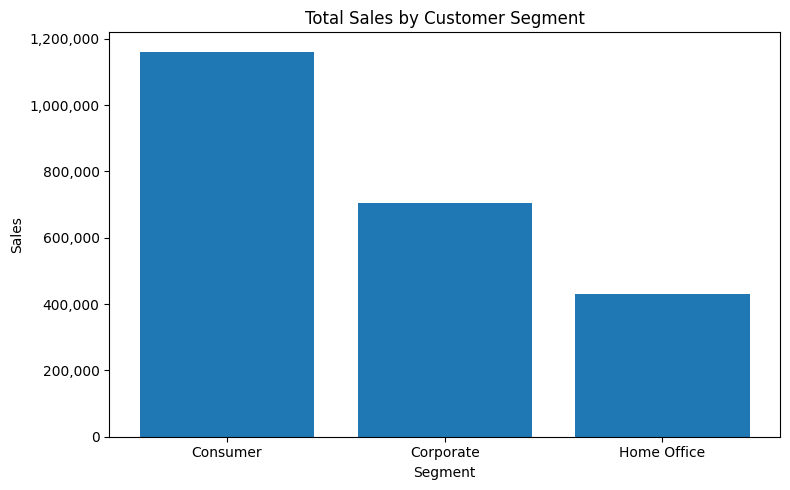

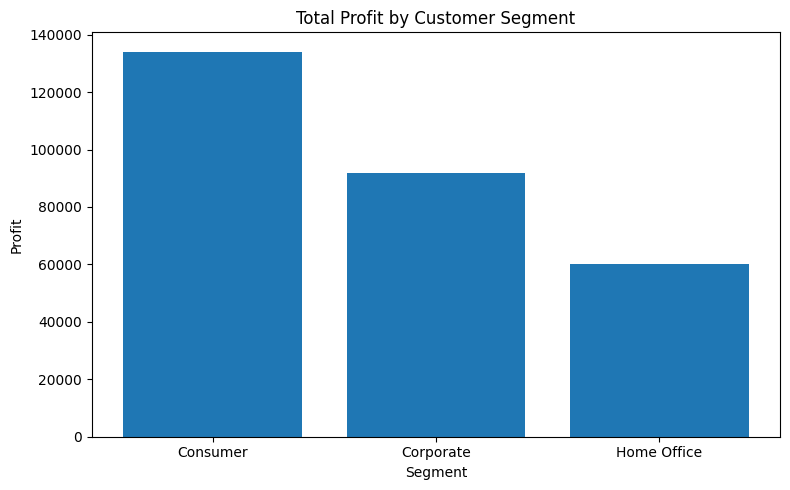

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
# ----------------------------
# 1. Load & Prepare Data
# ----------------------------
df = pd.read_excel("/content/DV+Sales+Data.xlsx")

# Group by Segment
segment_summary = df.groupby("Segment")[["Sales", "Profit"]].sum().reset_index()

# ----------------------------
# 2. Bar Chart – Total Sales by Segment
# ----------------------------
plt.figure(figsize=(8,5))
plt.bar(segment_summary["Segment"], segment_summary["Sales"])
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.title("Total Sales by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# ----------------------------
# 3. Bar Chart – Total Profit by Segment
# ----------------------------
plt.figure(figsize=(8,5))
plt.bar(segment_summary["Segment"], segment_summary["Profit"])
plt.title("Total Profit by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


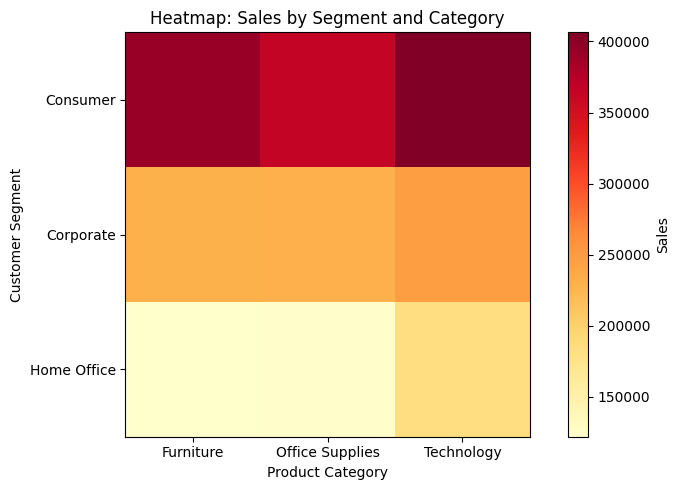

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("/content/DV+Sales+Data.xlsx")

# Create pivot table
pivot = df.pivot_table(
    values="Sales",
    index="Segment",
    columns="Category",
    aggfunc="sum"
)

# Plot heatmap
plt.figure(figsize=(8,5))
plt.imshow(pivot, cmap="YlOrRd")
plt.colorbar(label="Sales")
plt.title("Heatmap: Sales by Segment and Category")
plt.xlabel("Product Category")
plt.ylabel("Customer Segment")

# Set axis labels
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)

plt.tight_layout()
plt.show()


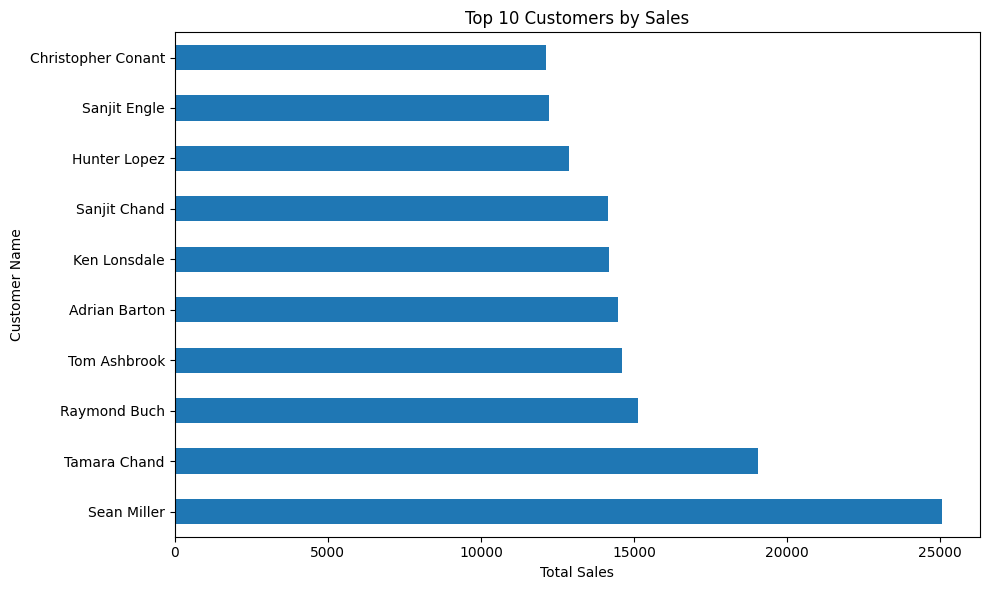

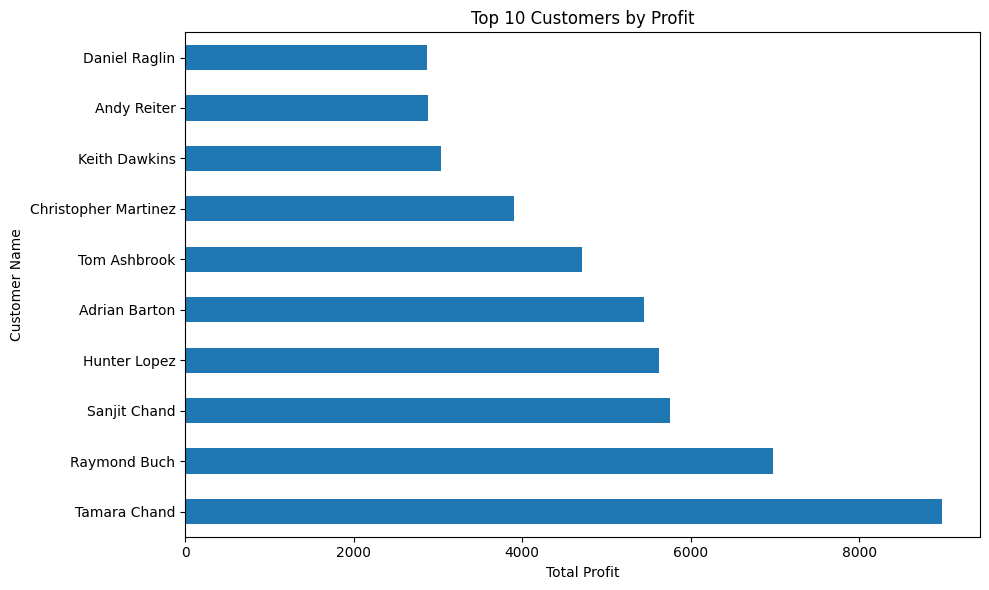

In [ ]:
#Top 10 Customers (Sales & Profit)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("/content/DV+Sales+Data.xlsx")

# Get top 10 customers by sales
top_sales = df.groupby("Customer Name")["Sales"].sum().nlargest(10)

# Plot directly using pandas
top_sales.plot(kind="barh", figsize=(10,6))

plt.title("Top 10 Customers by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()

top_profit = df.groupby("Customer Name")["Profit"].sum().nlargest(10)

# Plot directly using pandas
top_profit.plot(kind="barh", figsize=(10,6))

plt.title("Top 10 Customers by Profit")
plt.xlabel("Total Profit")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()


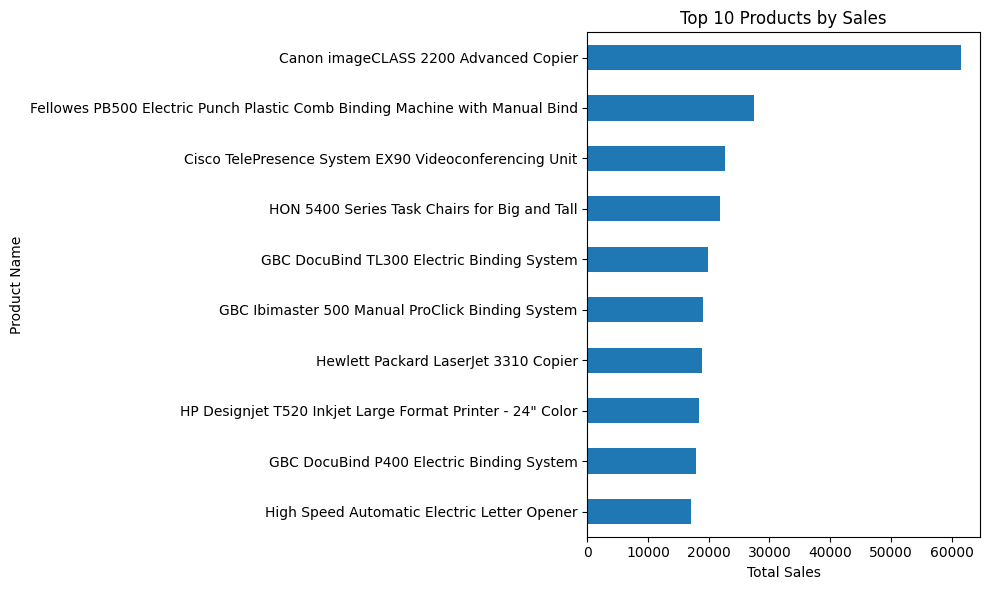

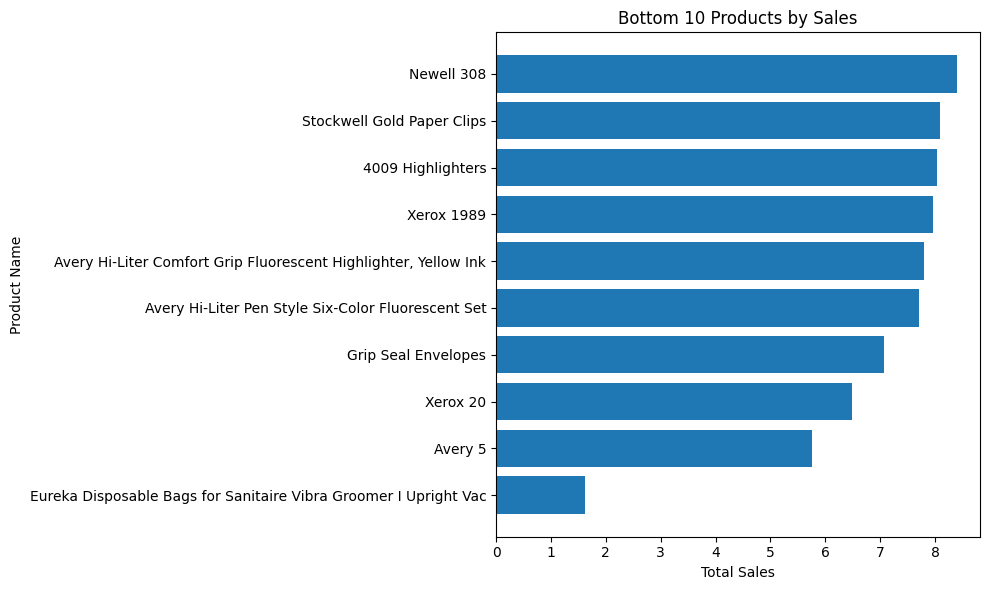

In [ ]:
#Which products are the top sellers and which are least performing?
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("/content/DV+Sales+Data.xlsx")

# Group by product name and calculate total sales
product_sales = df.groupby("Product Name")["Sales"].sum().sort_values()

# -------------------------------------------
# Top 10 Products by Sales
# -------------------------------------------
top_10 = product_sales.tail(10)   # last 10 are highest

plt.figure(figsize=(10,6))
top_10.plot(kind="barh")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# -------------------------------------------
# Bottom 10 Products by Sales
# Bottom 10 Products by Sales (Corrected)
bottom_10 = product_sales.head(10).reset_index()

# Ensure Sales is numeric
bottom_10["Sales"] = pd.to_numeric(bottom_10["Sales"], errors="coerce")

plt.figure(figsize=(10,6))
plt.barh(bottom_10["Product Name"], bottom_10["Sales"])

plt.title("Bottom 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")

plt.tight_layout()
plt.show()



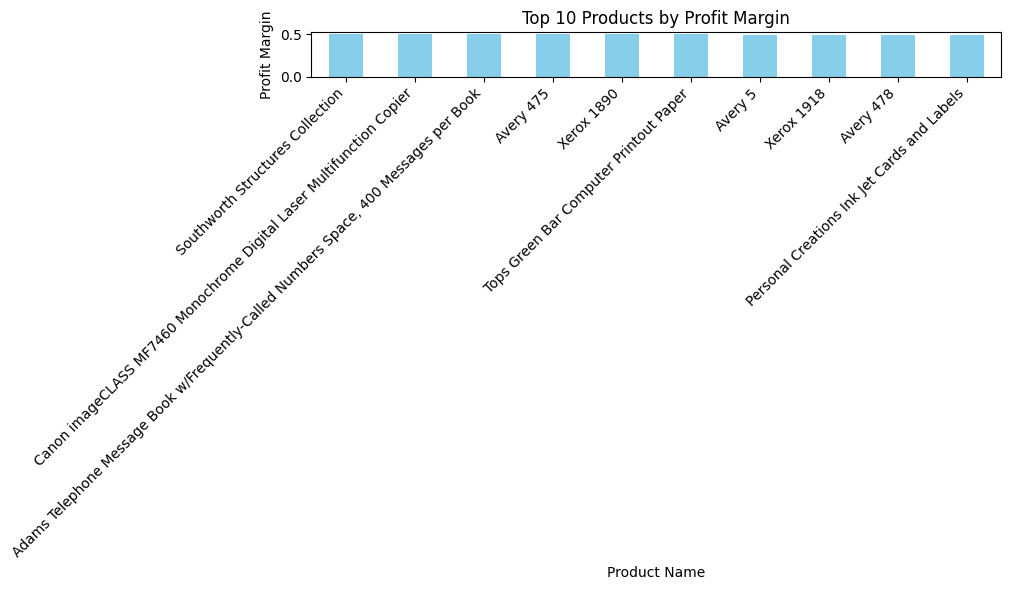

In [ ]:
#Top Profit Margin Products
# Calculate Profit Margin
df['Profit_Margin'] = df['Profit'] / df['Sales']

# Get top 10 products by profit margin
top_margin = df.groupby('Product Name')['Profit_Margin'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
top_margin.plot(kind='bar', color='skyblue')

plt.title("Top 10 Products by Profit Margin")
plt.ylabel("Profit Margin")
plt.xlabel("Product Name")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Re-load df to ensure fresh state if needed, and calculate Profit_Margin
df = pd.read_excel("/content/DV+Sales+Data.xlsx")
df = df.drop(['Postal Code','Country'],axis=1)
df['Profit_Margin'] = df['Profit'] / df['Sales']

# Aggregate data, including 'Category' for coloring
sales_profit_margin = df.groupby(['Product Name', 'Category']).agg({
    'Sales': 'sum',
    'Profit_Margin': 'mean'
}).reset_index()

# Create the interactive scatter plot
fig = px.scatter(sales_profit_margin,
                 x='Sales',
                 y='Profit_Margin',
                 color='Category', # Color dots by product category
                 hover_name='Product Name', # Show product name on hover
                 title='Sales vs Profit Margin (Product-Level) colored by Category')

# Display the interactive plot
fig.show()

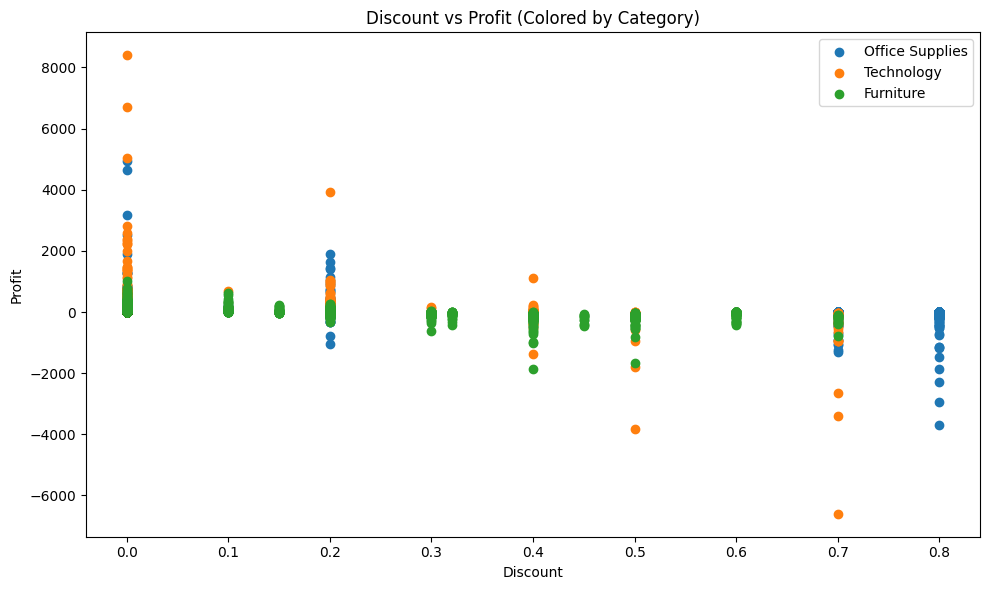

In [ ]:
#discount vs profit scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for category in df["Category"].unique():
    temp = df[df["Category"] == category]
    plt.scatter(temp["Discount"], temp["Profit"], label=category)

plt.title("Discount vs Profit (Colored by Category)")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

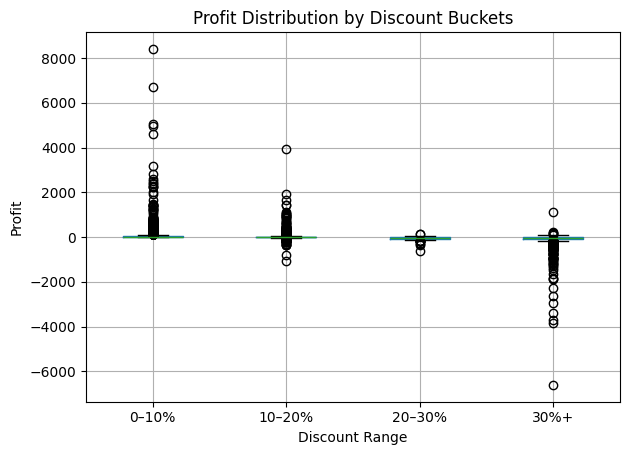

In [ ]:
#Box Plot (Profit by Discount Level Buckets)
import pandas as pd

# Create discount buckets
df["Discount_Bucket"] = pd.cut(
    df["Discount"],
    bins=[0, 0.1, 0.2, 0.3, 1],
    include_lowest=True,
    labels=["0–10%", "10–20%", "20–30%", "30%+"]
)
plt.figure(figsize=(10,6))
df.boxplot(column="Profit", by="Discount_Bucket")

plt.title("Profit Distribution by Discount Buckets")
plt.suptitle("")   # Removes the default title
plt.xlabel("Discount Range")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()



In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_Margin,Discount_Bucket
0,43,CA-2016-101343,2016-07-17,2016-07-22,Standard Class,RA-19885,Ruben Ausman,Corporate,Los Angeles,California,...,OFF-ST-10003479,Office Supplies,Storage,"Eldon Base for stackable storage shelf, platinum",77.88,2,0.0,3.8940,0.05,0–10%
1,514,CA-2017-163405,2017-12-21,2017-12-25,Standard Class,BN-11515,Bradley Nguyen,Consumer,Los Angeles,California,...,OFF-AR-10003811,Office Supplies,Art,Newell 327,6.63,3,0.0,1.7901,0.27,0–10%
2,515,CA-2017-163405,2017-12-21,2017-12-25,Standard Class,BN-11515,Bradley Nguyen,Consumer,Los Angeles,California,...,OFF-AR-10001246,Office Supplies,Art,Newell 317,5.88,2,0.0,1.7052,0.29,0–10%
3,1606,US-2016-115819,2016-04-19,2016-04-24,Second Class,JO-15280,Jas O'Carroll,Consumer,Los Angeles,California,...,OFF-AR-10000823,Office Supplies,Art,Newell 307,5.46,3,0.0,1.5288,0.28,0–10%
4,1607,US-2016-115819,2016-04-19,2016-04-24,Second Class,JO-15280,Jas O'Carroll,Consumer,Los Angeles,California,...,OFF-AR-10004456,Office Supplies,Art,Panasonic KP-4ABK Battery-Operated Pencil Shar...,73.20,5,0.0,21.2280,0.29,0–10%


/tmp/ipython-input-3023816475.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1000x600 with 0 Axes>

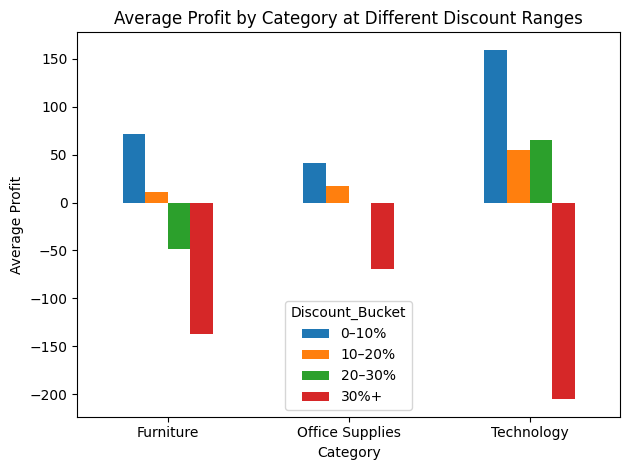

In [ ]:
#Bar Chart – Average Profit by Category at Each Discount Range
avg_profit = df.groupby(["Category", "Discount_Bucket"])["Profit"].mean().unstack()
plt.figure(figsize=(10,6))
avg_profit.plot(kind="bar")

plt.title("Average Profit by Category at Different Discount Ranges")
plt.xlabel("Category")
plt.ylabel("Average Profit")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


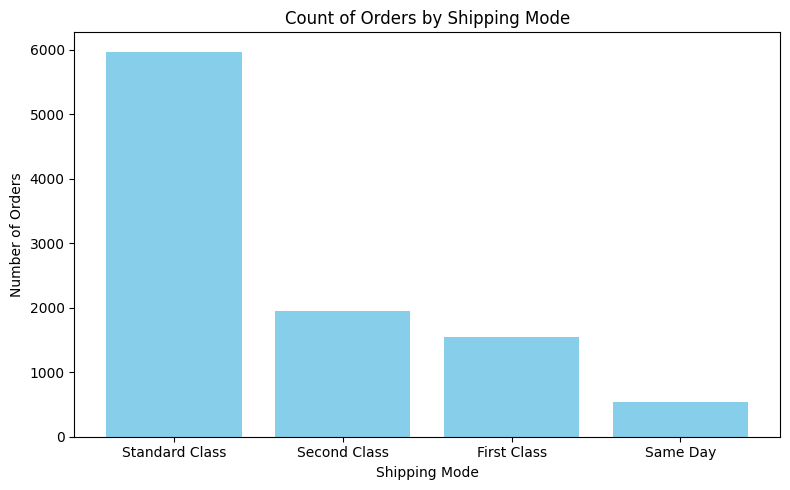

In [ ]:
#shipping analysis
#Bar Chart — Count of Orders by Shipping Mode
import matplotlib.pyplot as plt

ship_counts = df["Ship Mode"].value_counts()

plt.figure(figsize=(8,5))
plt.bar(ship_counts.index, ship_counts.values, color='skyblue')

plt.title("Count of Orders by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


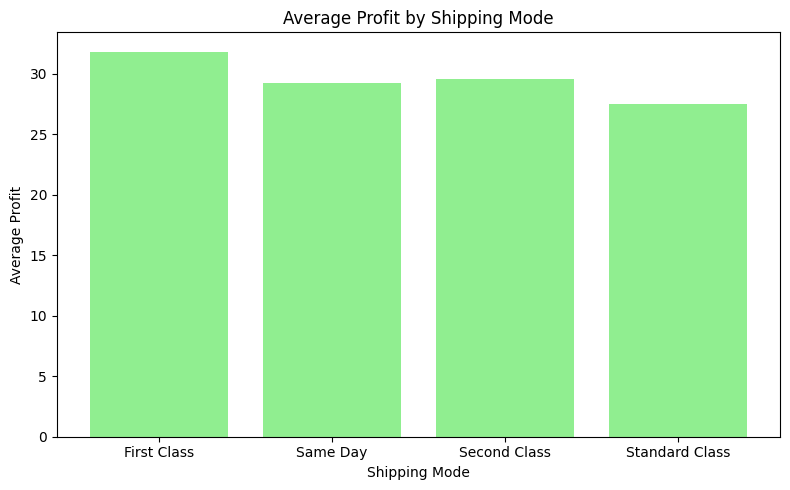

In [ ]:
#Bar Chart — Average Profit by Shipping Mode
avg_profit_ship = df.groupby("Ship Mode")["Profit"].mean()

plt.figure(figsize=(8,5))
plt.bar(avg_profit_ship.index, avg_profit_ship.values, color='lightgreen')

plt.title("Average Profit by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Average Profit")
plt.tight_layout()
plt.show()


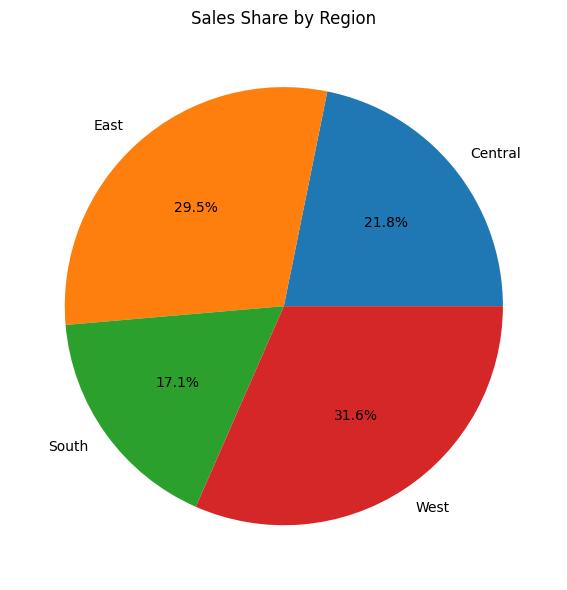

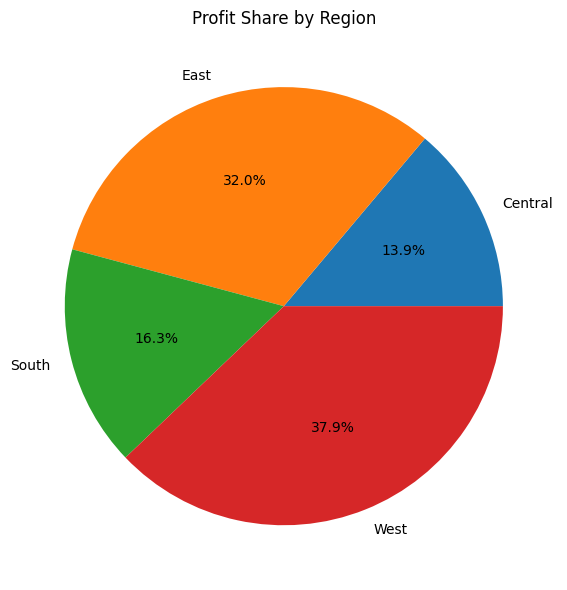

In [ ]:
#Pie Chart – Sales or Profit Share by Region. Sales Share by Region
import matplotlib.pyplot as plt

region_sales = df.groupby("Region")["Sales"].sum()

plt.figure(figsize=(8,6))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%')
plt.title("Sales Share by Region")
plt.tight_layout()
plt.show()

region_profit = df.groupby("Region")["Profit"].sum()

plt.figure(figsize=(8,6))
plt.pie(region_profit, labels=region_profit.index, autopct='%1.1f%%')
plt.title("Profit Share by Region")
plt.tight_layout()
plt.show()


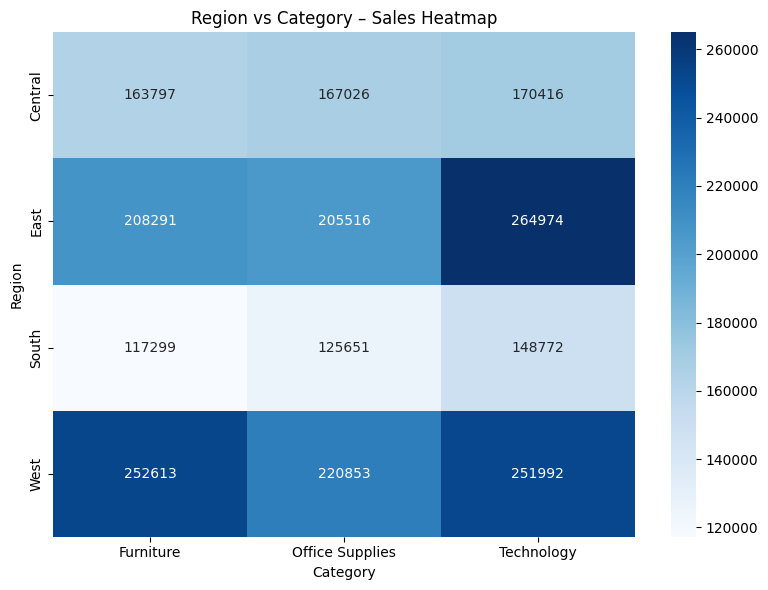

In [ ]:
#Heatmap – Region vs Category (Sales)
import seaborn as sns
import matplotlib.pyplot as plt

heat = df.groupby(["Region", "Category"])["Sales"].sum().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(heat, annot=True, fmt=".0f", cmap="Blues")

plt.title("Region vs Category – Sales Heatmap")
plt.xlabel("Category")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


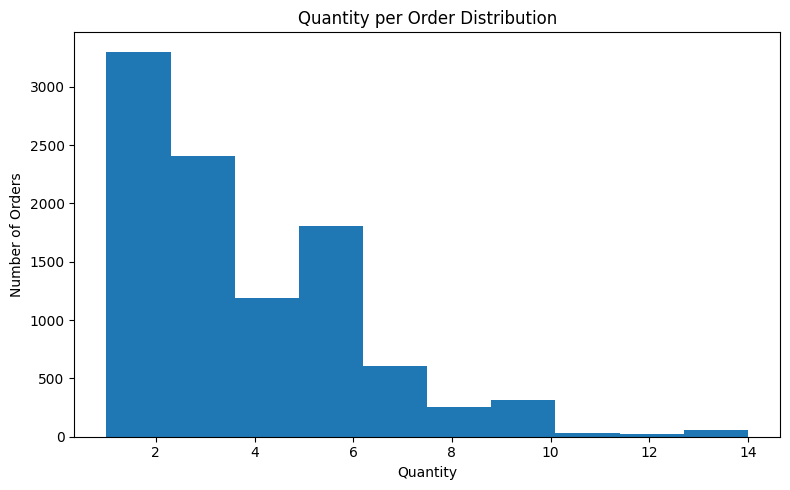

In [ ]:
#Histogram – Quantity per Order
plt.figure(figsize=(8,5))
plt.hist(df["Quantity"], bins=10)

plt.title("Quantity per Order Distribution")
plt.xlabel("Quantity")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


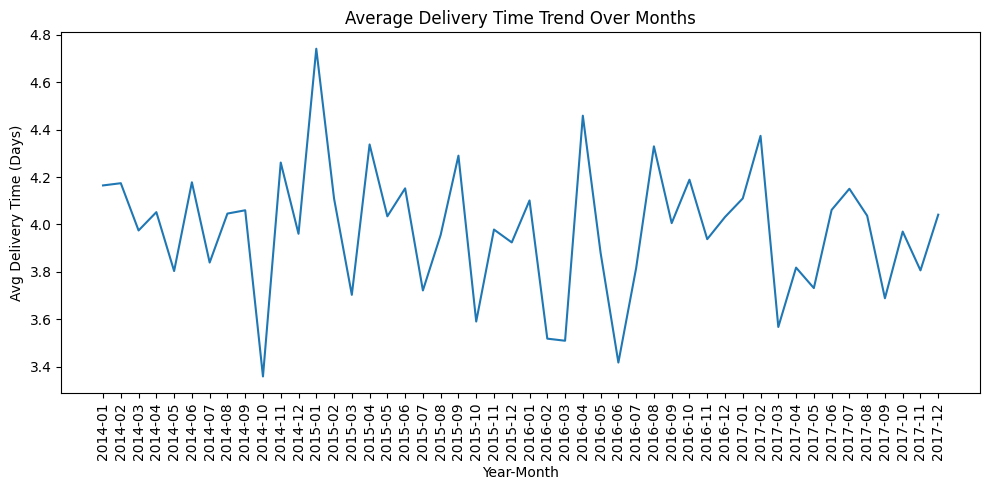

In [ ]:
#Line Chart – Delivery Time Trend Over Months
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["Delivery_Time"] = (df["Ship Date"] - df["Order Date"]).dt.days
df["Year_Month"] = df["Order Date"].dt.to_period("M").astype(str)
delivery_trend = df.groupby("Year_Month")["Delivery_Time"].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(delivery_trend["Year_Month"], delivery_trend["Delivery_Time"])

plt.title("Average Delivery Time Trend Over Months")
plt.xlabel("Year-Month")
plt.ylabel("Avg Delivery Time (Days)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


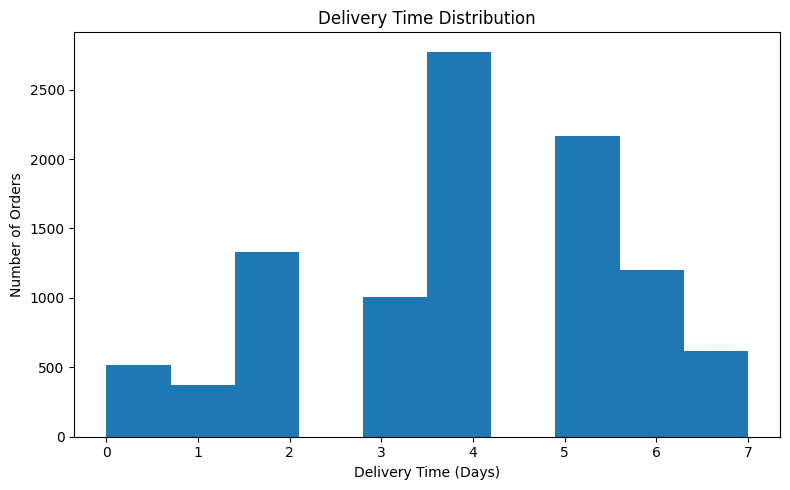

In [ ]:
#Histogram – Delivery Time Distribution based on no of orders
plt.figure(figsize=(8,5))
plt.hist(df["Delivery_Time"], bins=10)

plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


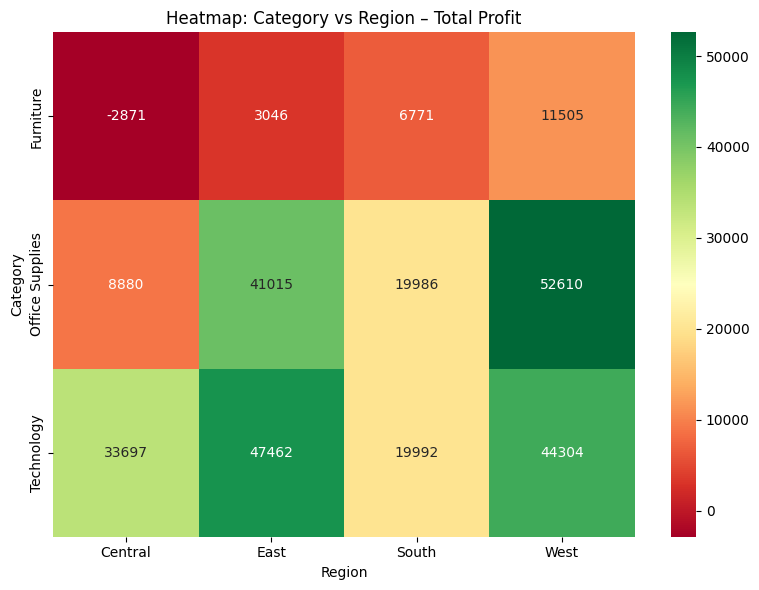

In [ ]:
#HEATMAP – Category × Region (Total Profit)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pivot table: Category vs Region with Profit
heat = df.groupby(["Category", "Region"])["Profit"].sum().unstack()

plt.figure(figsize=(8,6))
sns.heatmap(heat, annot=True, fmt=".0f", cmap="RdYlGn")

plt.title("Heatmap: Category vs Region – Total Profit")
plt.xlabel("Region")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


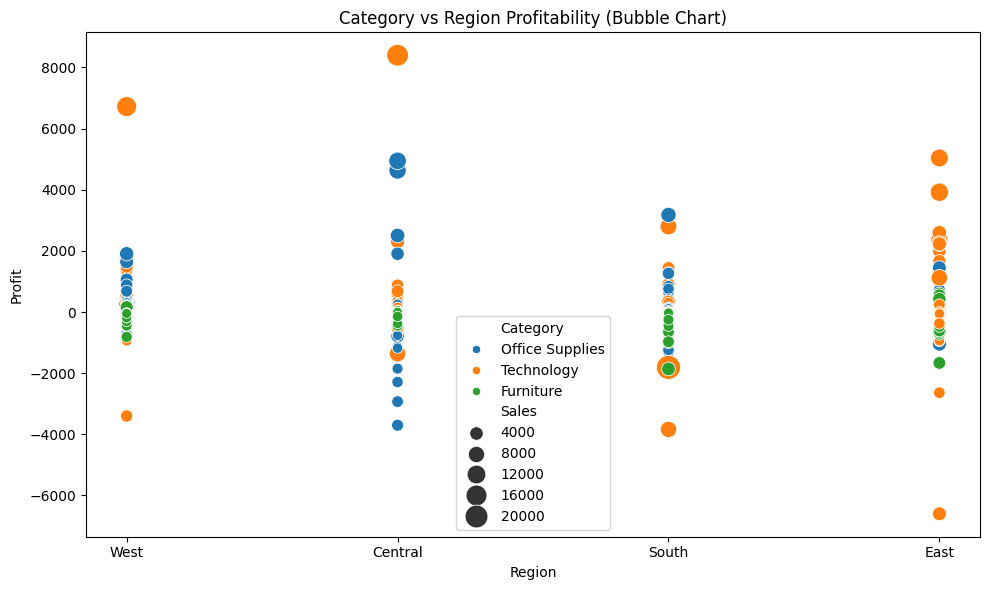

In [ ]:
#SCATTER PLOT – Category vs Region Profitability (Colored & Sized)
#Bigger bubbles = higher sales .Helps identify “high sales but loss-making” regions
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x="Region",
    y="Profit",
    hue="Category",
    size="Sales",
    sizes=(50, 300)   # size range for bubbles
)

plt.title("Category vs Region Profitability (Bubble Chart)")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


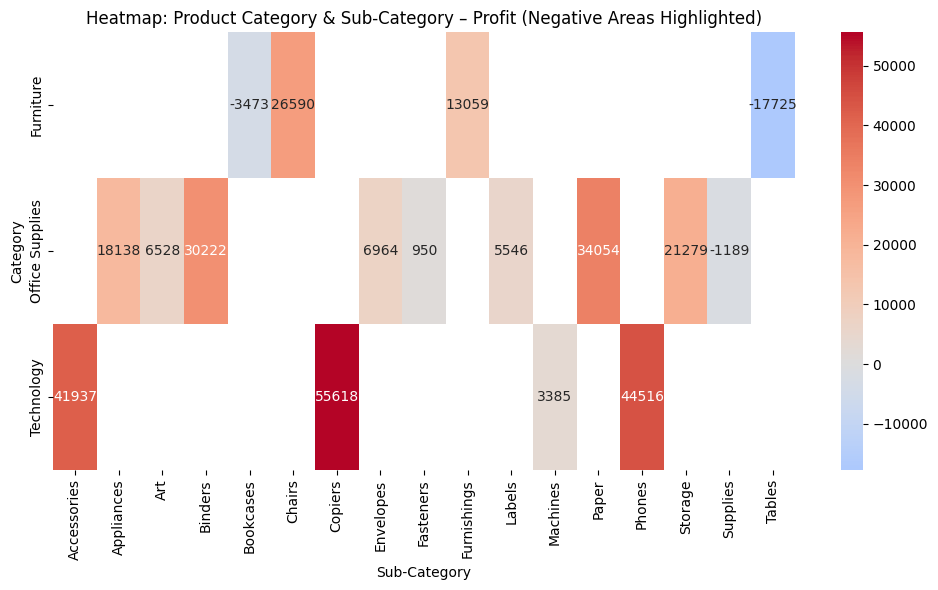

In [ ]:
#HEATMAP – Product Category vs Profit (Negative Areas Highlighted)
#This identifies categories that frequently produce losses even at low/zero discounts.
# Summarize profit by Category and Sub-Category
cat_profit = df.groupby(["Category", "Sub-Category"])["Profit"].sum().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(cat_profit, annot=True, fmt=".0f", cmap="coolwarm", center=0)

plt.title("Heatmap: Product Category & Sub-Category – Profit (Negative Areas Highlighted)")
plt.xlabel("Sub-Category")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit_Margin,Discount_Bucket,Delivery_Time,Year_Month
0,43,CA-2016-101343,2016-07-17,2016-07-22,Standard Class,RA-19885,Ruben Ausman,Corporate,Los Angeles,California,...,Storage,"Eldon Base for stackable storage shelf, platinum",77.88,2,0.0,3.8940,0.05,0–10%,5,2016-07
1,514,CA-2017-163405,2017-12-21,2017-12-25,Standard Class,BN-11515,Bradley Nguyen,Consumer,Los Angeles,California,...,Art,Newell 327,6.63,3,0.0,1.7901,0.27,0–10%,4,2017-12
2,515,CA-2017-163405,2017-12-21,2017-12-25,Standard Class,BN-11515,Bradley Nguyen,Consumer,Los Angeles,California,...,Art,Newell 317,5.88,2,0.0,1.7052,0.29,0–10%,4,2017-12
3,1606,US-2016-115819,2016-04-19,2016-04-24,Second Class,JO-15280,Jas O'Carroll,Consumer,Los Angeles,California,...,Art,Newell 307,5.46,3,0.0,1.5288,0.28,0–10%,5,2016-04
4,1607,US-2016-115819,2016-04-19,2016-04-24,Second Class,JO-15280,Jas O'Carroll,Consumer,Los Angeles,California,...,Art,Panasonic KP-4ABK Battery-Operated Pencil Shar...,73.20,5,0.0,21.2280,0.29,0–10%,5,2016-04


In [ ]:
df.to_csv('DV+Sales+Data.csv')


In [ ]:
from google.colab import files
files.download('DV+Sales+Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>